# Ejercicio: Análisis y Modelado de la Calidad de Bananas

En este ejercicio se utilizará el dataset `banana_quality.csv` para realizar un análisis completo y desarrollar un modelo de clasificación (Regresión Logística) que permita predecir la calidad de las bananas (Good vs Bad). El ejercicio se divide en los siguientes pasos:

## Paso 1: Descargar el Dataset

Utiliza el siguiente enlace para descargar el dataset:

https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/banana_quality.csv

In [12]:
!wget https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/banana_quality.csv

--2025-03-19 21:00:30--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/banana_quality.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 630007 (615K) [text/plain]
Saving to: ‘banana_quality.csv.1’

banana_quality.csv. 100%[===================>] 615.24K  --.-KB/s    in 0.03s   

2025-03-19 21:00:30 (18.6 MB/s) - ‘banana_quality.csv.1’ saved [630007/630007]



## Paso 2: Cargar el Dataset

Importa las librerías necesarias y carga el dataset en un DataFrame de Pandas.

In [13]:
import pandas as pd
from matplotlib import pyplot as plt
# Cargar el dataset
df = pd.read_csv('banana_quality.csv')

# Visualizar las primeras filas
print('Primeras filas del dataset:')
display(df.head())

Primeras filas del dataset:


,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


## Paso 3: Exploración Inicial

Revisa la información general del DataFrame y genera un resumen estadístico. Identifica la estructura y si existen valores nulos.

In [14]:
print('\nInformación general del DataFrame:')
print(df.info())

print('\nResumen estadístico:')
print(df.describe())

print('\nValores nulos:')
print(df.isnull().sum())



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB
None

Resumen estadístico:
              Size       Weight    Sweetness     Softness  HarvestTime  \
count  8000.000000  8000.000000  8000.000000  8000.000000  8000.000000   
mean     -0.747802    -0.761019    -0.770224    -0.014441    -0.751288   
std       2.136023     2.015934     1.948455     2.065216     1.996661   
min      -7.998074    -8.283002    -6.434022    -6.959320    

## Paso 4: Análisis de la Variable Objetivo

Cuenta cuántas instancias hay de cada categoría en la variable **Quality**. Esto permitirá identificar si existen desbalances en la clase.

In [15]:
print('\nConteo de instancias por categoría en Quality:')
print(df['Quality'].value_counts())



Conteo de instancias por categoría en Quality:
Quality
Good    4006
Bad     3994
Name: count, dtype: int64


## Paso 5: Preprocesamiento de la Variable Objetivo

Convierte la variable **Quality** a formato numérico (por ejemplo, Good -> 1 y Bad -> 0) para poder utilizarla en el modelo.

In [16]:

df['Quality'] = df['Quality'].map({'Good': 1, 'Bad': 0})

print('\nConteo de instancias por categoría en Quality (después de la conversión):')
print(df['Quality'].value_counts())



Conteo de instancias por categoría en Quality (después de la conversión):
Quality
1    4006
0    3994
Name: count, dtype: int64


## Paso 6: Selección de Variables (Features)

Define las variables independientes (X) y la variable dependiente (y). Usa todas las columnas numéricas o selecciona aquellas que consideres relevantes para predecir la calidad.

In [22]:
X = df[['Size', 'Weight', 'Sweetness']]
y = df['Quality']


## Paso 7: División en Conjuntos de Entrenamiento y Prueba

Separa el dataset en un conjunto de entrenamiento (70%) y otro de evaluación/prueba (30%). Asegúrate de estratificar para mantener el balance de clases.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('Tamaño del conjunto de entrenamiento:', len(X_train))
print('Tamaño del conjunto de prueba:', len(X_test))


Tamaño del conjunto de entrenamiento: 5600
Tamaño del conjunto de prueba: 2400


## Paso 8: Validación del Balanceo de Clases

Verifica que las clases estén balanceadas en los conjuntos de entrenamiento y prueba. Usa conteos y visualizaciones para comprobarlo.


Conteo de instancias por categoría en Quality (conjunto de entrenamiento):
Quality
1    2804
0    2796
Name: count, dtype: int64

Conteo de instancias por categoría en Quality (conjunto de prueba):
Quality
1    1202
0    1198
Name: count, dtype: int64


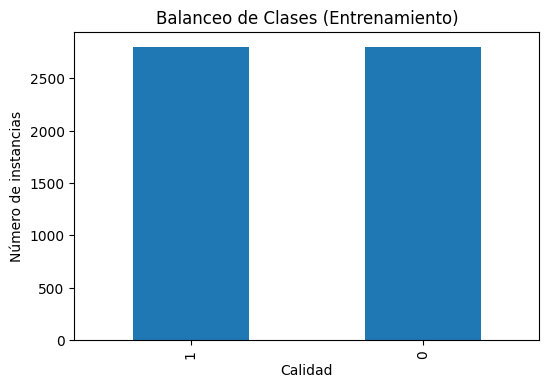

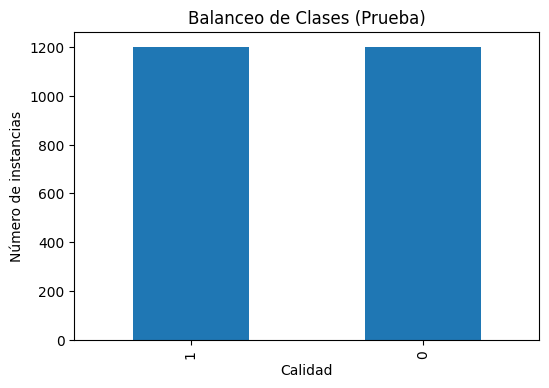


Proporción de cada clase en el conjunto de entrenamiento:
Quality
1    0.500714
0    0.499286
Name: proportion, dtype: float64

Proporción de cada clase en el conjunto de prueba:


,proportion
Quality,
1,0.500833
0,0.499167


In [25]:

print('\nConteo de instancias por categoría en Quality (conjunto de entrenamiento):')
print(y_train.value_counts())

# Verificar el balanceo de clases en el conjunto de prueba
print('\nConteo de instancias por categoría en Quality (conjunto de prueba):')
print(y_test.value_counts())

# Visualizar el balanceo de clases en el conjunto de entrenamiento
plt.figure(figsize=(6, 4))
y_train.value_counts().plot(kind='bar', title='Balanceo de Clases (Entrenamiento)')
plt.xlabel('Calidad')
plt.ylabel('Número de instancias')
plt.show()

# Visualizar el balanceo de clases en el conjunto de prueba
plt.figure(figsize=(6, 4))
y_test.value_counts().plot(kind='bar', title='Balanceo de Clases (Prueba)')
plt.xlabel('Calidad')
plt.ylabel('Número de instancias')
plt.show()

# Calcular la proporción de cada clase en el conjunto de entrenamiento
train_class_proportions = y_train.value_counts(normalize=True)
print('\nProporción de cada clase en el conjunto de entrenamiento:')
print(train_class_proportions)

# Calcular la proporción de cada clase en el conjunto de prueba
test_class_proportions = y_test.value_counts(normalize=True)
print('\nProporción de cada clase en el conjunto de prueba:')
test_class_proportions


## Paso 9: Entrenamiento del Modelo de Regresión Logística

Importa el módulo de Regresión Logística de Scikit-Learn y entrena el modelo utilizando el conjunto de entrenamiento.

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)


LogisticRegression()

## Paso 10: Predicción en el Conjunto de Prueba

Utiliza el modelo entrenado para realizar predicciones en el conjunto de prueba.

In [27]:
y_pred = model.predict(X_test)


## Paso 11: Evaluación del Modelo

Calcula las principales métricas de evaluación: accuracy, matriz de confusión, precisión, recall y f1-score. Además, genera un reporte de clasificación.

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:\n", cm)

# Generar un reporte de clasificación
report = classification_report(y_test, y_pred)
print("\nReporte de clasificación:\n", report)


Precisión del modelo: 0.8183333333333334

Matriz de confusión:
 [[987 211]
 [225 977]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1198
           1       0.82      0.81      0.82      1202

    accuracy                           0.82      2400
   macro avg       0.82      0.82      0.82      2400
weighted avg       0.82      0.82      0.82      2400



## Paso 12: Visualización de la Matriz de Confusión y Curva ROC AUC

Visualiza la matriz de confusión mediante un heatmap. Luego, calcula y visualiza la curva ROC y el área bajo la curva (AUC) para evaluar la capacidad del modelo de distinguir entre las clases.

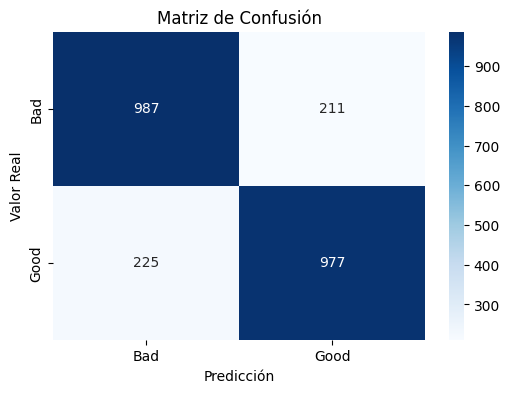

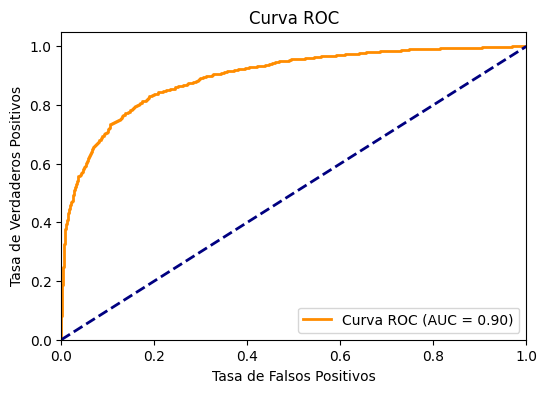

In [29]:
# prompt: Visualiza la matriz de confusión mediante un heatmap. Luego, calcula y visualiza la curva ROC y el área bajo la curva (AUC) para evaluar la capacidad del modelo de distinguir entre las clases.

import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Visualizar la matriz de confusión como un heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

# Calcular la curva ROC y el AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


## Paso 13 (Opcional): Envío de Métricas por Correo

Como actividad adicional, prepara un código que genere un resumen con las 5 métricas principales (Accuracy, Precisión, Recall, F1-Score y AUC) y simula el envío de estas métricas por correo (puedes usar print o exportar a un archivo de texto como actividad de integración).

In [41]:
def generate_metrics_summary(y_test, y_pred, y_pred_proba):
  """Genera un resumen con las métricas principales del modelo."""

  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred, output_dict=True)
  precision = report['1']['precision']
  recall = report['1']['recall']
  f1_score = report['1']['f1-score']

  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)

  summary = f"""
  Resumen de Métricas del Modelo:

  Accuracy: {accuracy:.4f}
  Precisión: {precision:.4f}
  Recall: {recall:.4f}
  F1-Score: {f1_score:.4f}
  AUC: {roc_auc:.4f}
  """
  return summary



summary = generate_metrics_summary(y_test, y_pred, y_pred_proba)
print(summary)



  Resumen de Métricas del Modelo:

  Accuracy: 0.8183
  Precisión: 0.8224
  Recall: 0.8128
  F1-Score: 0.8176
  AUC: 0.8976
  


## Conclusiones

En este ejercicio se ha llevado a cabo un análisis completo sobre la calidad de las bananas. A partir de los distintos pasos realizados, se espera que los estudiantes sean capaces de:

- Explorar y entender la estructura del dataset.
- Preprocesar los datos, incluyendo la conversión de variables categóricas a numéricas.
- Validar el balance de clases en los conjuntos de entrenamiento y prueba.
- Entrenar un modelo de Regresión Logística.
- Evaluar el modelo usando diversas métricas (accuracy, matriz de confusión, reporte de clasificación y curva ROC AUC).

Finalmente, deben ser capaces de interpretar los resultados y extraer conclusiones sobre la capacidad del modelo para predecir la calidad de las bananas.